<a href="https://colab.research.google.com/github/mgoetze06/fotobooth/blob/main/cvml/Build_Machine_Learning_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Guided Project: Build an Image Classifier with Python**

In [17]:
#Here we load the Mnist data from Keras
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#get an idea of shape of train data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


3


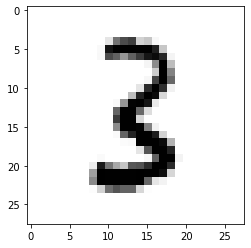

In [18]:
#Here we preview an element of the data
import matplotlib.pyplot as plt
 # Only use this if using iPython
image_index = 50000 # You may select anything up to 60,000
print(y_train[image_index]) # To display the label number
plt.imshow(x_train[image_index], cmap='Greys') #to show the image associated with label

In [19]:
x_train[image_index] #array of numbers between 0 and 255 (grayscale)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
        205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
        254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [20]:
#Reshaping and preprocessing
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #reshape into only one dimension reshape(60000,28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

#new range is from 0 to 1

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [21]:
print(x_train[0][14])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.31764707]
 [0.9411765 ]
 [0.99215686]
 [0.99215686]
 [0.46666667]
 [0.09803922]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [22]:
#Building to Keras
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential() #chosen Keras model
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #convolution
#conv layer extracts features from images; rectangles of size 3,3 are extracted from image

model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer
#reduce complexity from features of conv layer (reduce from 3x3 to 2x2)

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#convert into features into single column

model.add(Dense(64, activation=tf.nn.relu)) #dense layer relu
#fully connected layer

model.add(Dropout(0.2))
#prevent overfitting by not using 20% of the training data


model.add(Dense(10,activation=tf.nn.softmax)) #dense layer softmax
#last dense layer has a parameter of 10 --> 10 digits needed as output


In [23]:
#Compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2464 - accuracy: 0.9259
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1087 - accuracy: 0.9673
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0794 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0613 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0534 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0441 - accuracy: 0.9860
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0398 - accuracy: 0.9865
Epoch 8/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0350 - accuracy: 0.9880
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0315 - accuracy: 0.9894
Epoch 10/10
1875/1875 [==============================] - 33s 18m

In [24]:
#evaluating
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0660 - accuracy: 0.9829


[0.06601423770189285, 0.9829000234603882]

prediction: 5
true label: 5


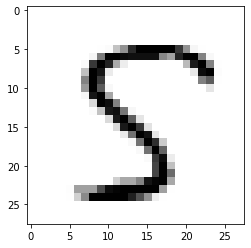

In [29]:
#testing on test data
image_index = 333 #choose random value up to 10000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("prediction: " + str(pred.argmax()))
print("true label: " + str(y_test[image_index]))


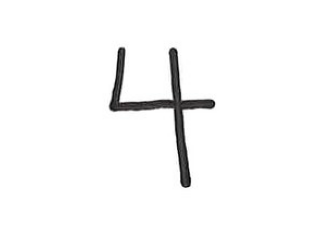

In [30]:
#Previewing the downloaded image 
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
im = cv2.imread("4.jpg")
# Show image
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [31]:
im.shape

(200, 280, 3)

In [33]:
from tensorflow.keras.preprocessing import image #Import Keras image processor

In [34]:
#load downloaded image and resze to target size
img = image.load_img("4.jpg", target_size=(28, 28),color_mode="grayscale")


In [35]:
#convert loaded and resized image to array of numbers
img_array = image.img_to_array(img)


In [36]:
#Confirm new shape
img_array.shape

(28, 28, 1)

In [37]:
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

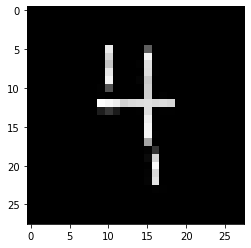

In [38]:
plt.imshow(img_array,cmap="Greys")

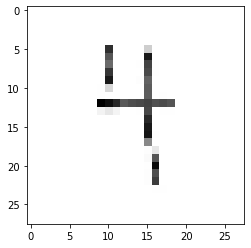

In [39]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

# Prediction on sample image

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
4


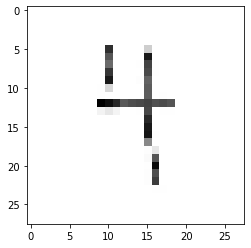

In [42]:
#Running Prediction on the image

plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred)
print(pred.argmax())
